# Clean top-level comments
1. Install required packages **nltk, wordcloud**.
2. Create function to clean text: Tokenize, remove punctuation and stop words, stem, remove quotes, data type transformation.
3. Create wordclouds and save them to the folder called WordClouds

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from collections import Counter

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from wordcloud import WordCloud

In [2]:
# comment_groups = []
# f = open("./Datasets/depression.txt")
# print(f.read())

In [3]:
# EDA
# num_lines =0
# num_words =0
# num_chars =0
# with open("./Datasets/depression.txt", 'r') as f:
#     for line in f:
#         words = line.split()
#         num_lines += 1
#         num_words += len(words)
#         num_chars += len(line)
# print ("numbers of words", num_words)
# print("number of lines", num_lines)
# print("number of chars", num_chars)

In [4]:
def tokenize(text):
    """
    Tokenize the text: break sentences into words
    """
    clean_text = word_tokenize(text)
    return clean_text

In [5]:
def round1_clean(text):
    """
    Remove the punctuation and stop words
    """
    punctuation = list(string.punctuation)
    stopWords = set(stopwords.words('english'))
    round1_clean_text = []
    for w in text:
        if w.lower() not in stopWords and w not in punctuation:
            round1_clean_text.append(w)
    return round1_clean_text

In [7]:
def stem(round1_clean_text):
    """
    Stemming: e.g swam, swimming -> swim
    """
    portStemmer = PorterStemmer()
    stemWords = [portStemmer.stem(word) for word in round1_clean_text]
    return stemWords

In [8]:
# Counter(stemWords).most_common()

In [9]:
# remove quotes
def remove_quotes(text):
    """
    remove quotes
    """
    round2_clean_text = []
    quotes = ['’',"''",'``']
    for word in text:
        if word not in quotes:
            round2_clean_text.append(word)
    return round2_clean_text

In [ ]:
def string_words(text):
    """
    Transform a list of words to a string for wordcloud
    """
    comment_words = ''
    for words in text:
        comment_words = comment_words + words + ' '
    
    return comment_words

In [ ]:
def wordcloud(text,group_name):
    """
    Create wordcloud; the background color is black, change white to use background_color="white"
    """
    stopWords = set(stopwords.words('english'))
    wc = WordCloud(colormap="Dark2",
               max_font_size=150, max_words=100,random_state=42,stopwords=stopWords,
                  width=1600, height=800).generate(text)
    plt.figure(figsize=[20,10],facecolor='k')
    plt.imshow(wc,interpolation='bilinear')
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.savefig(f"./WordClouds/{group_name}_wc.png", facecolor='k', bbox_inches='tight')

In [ ]:
def preprocessing(text,group):
    """
    Text cleaning with above functions
    """
    group_name = group
    tok_text = tokenize(text)
#     print(f"Tokenized words:{tok_text}")
    round1_clean_text = round1_clean(tok_text)
    stem_words = stem(round1_clean_text)
    round2_clean_text = remove_quotes(stem_words)
#     print(round2_clean_text)
    wc_words = string_words(round2_clean_text)
    wordcloud(wc_words, group_name)
    return round2_clean_text

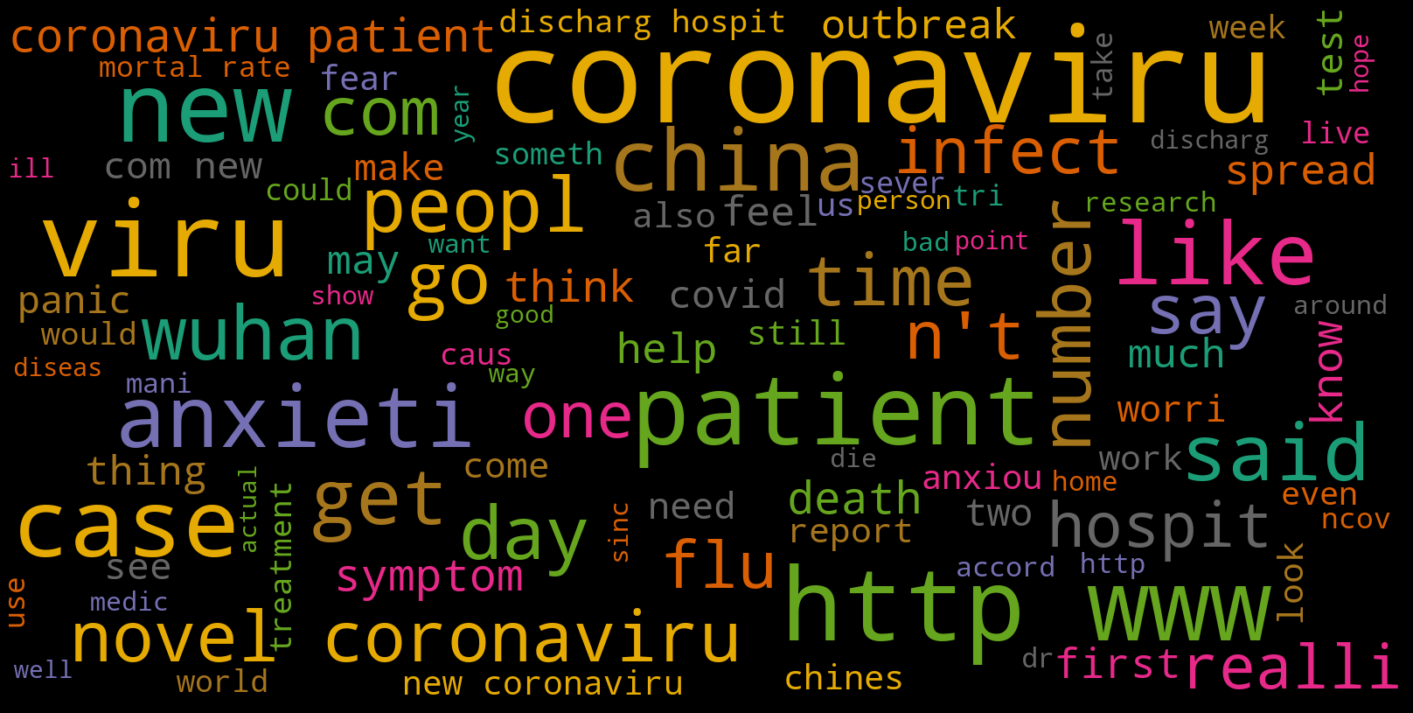

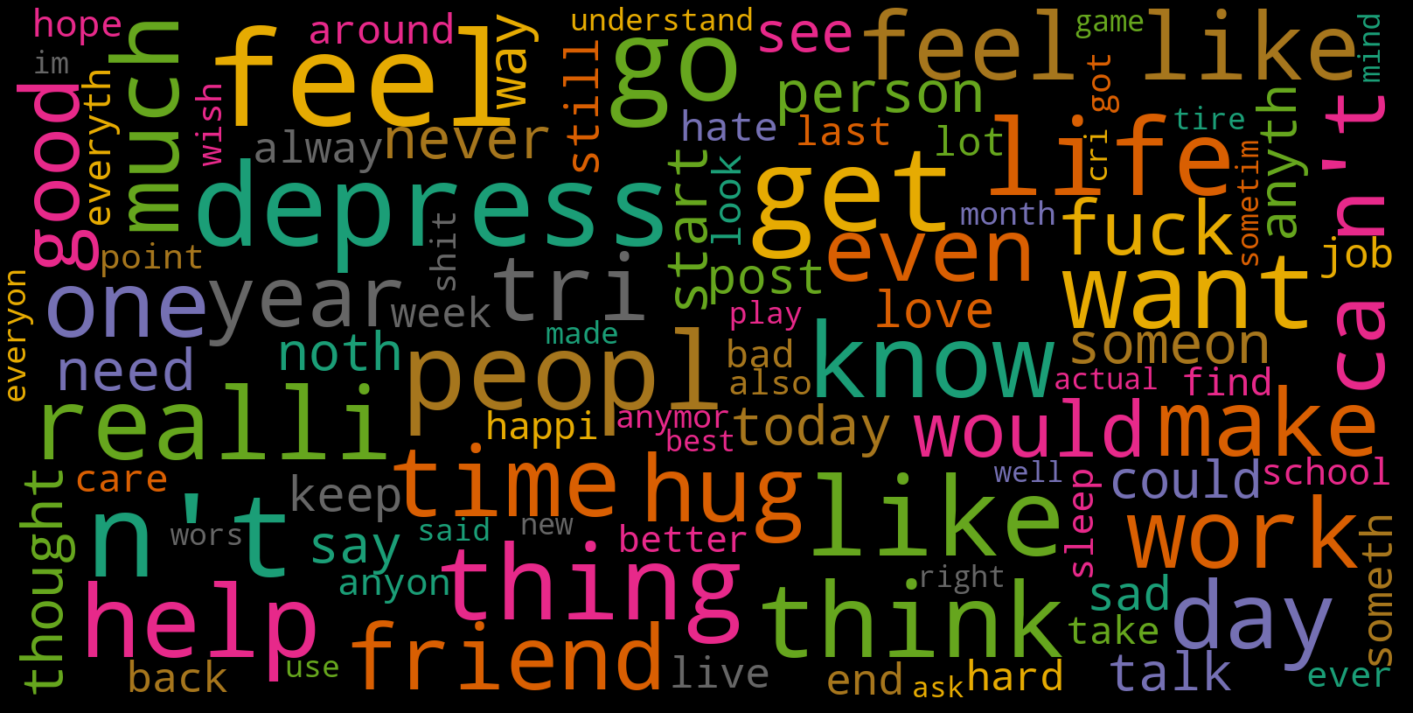

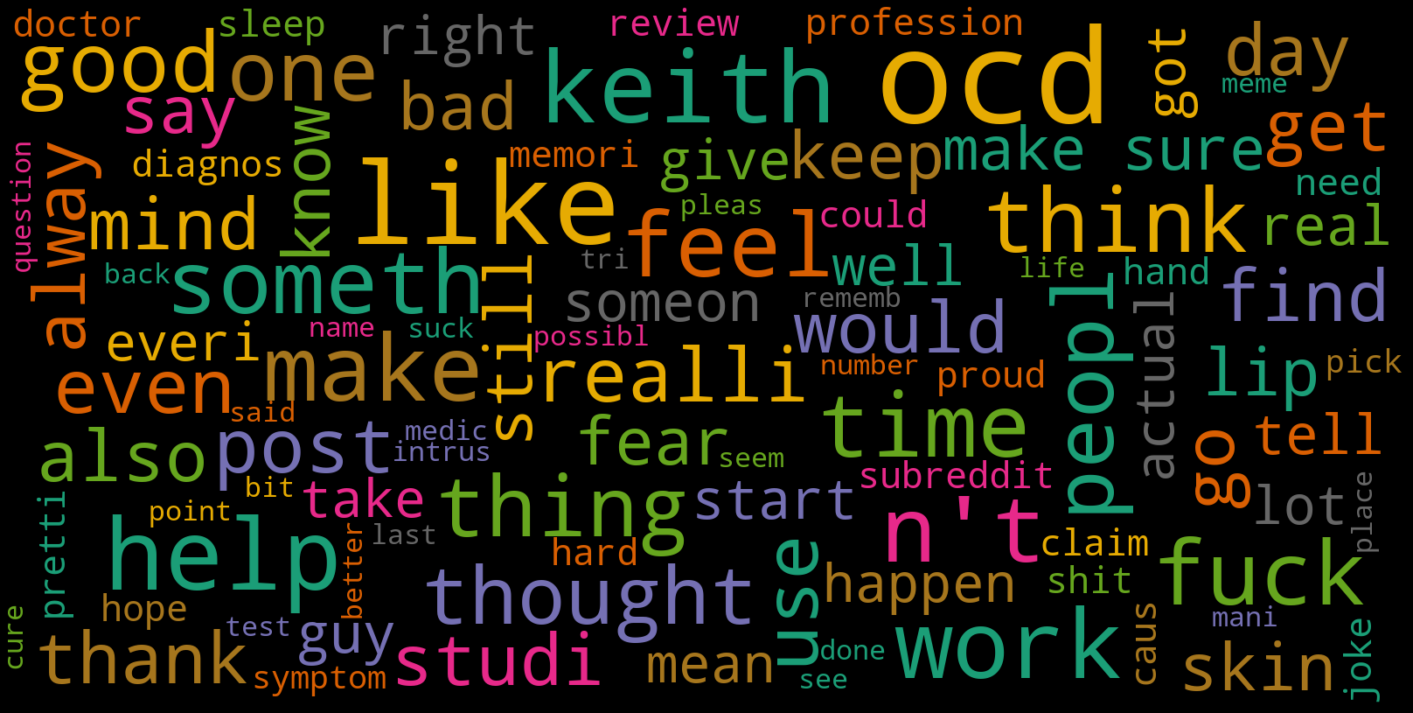

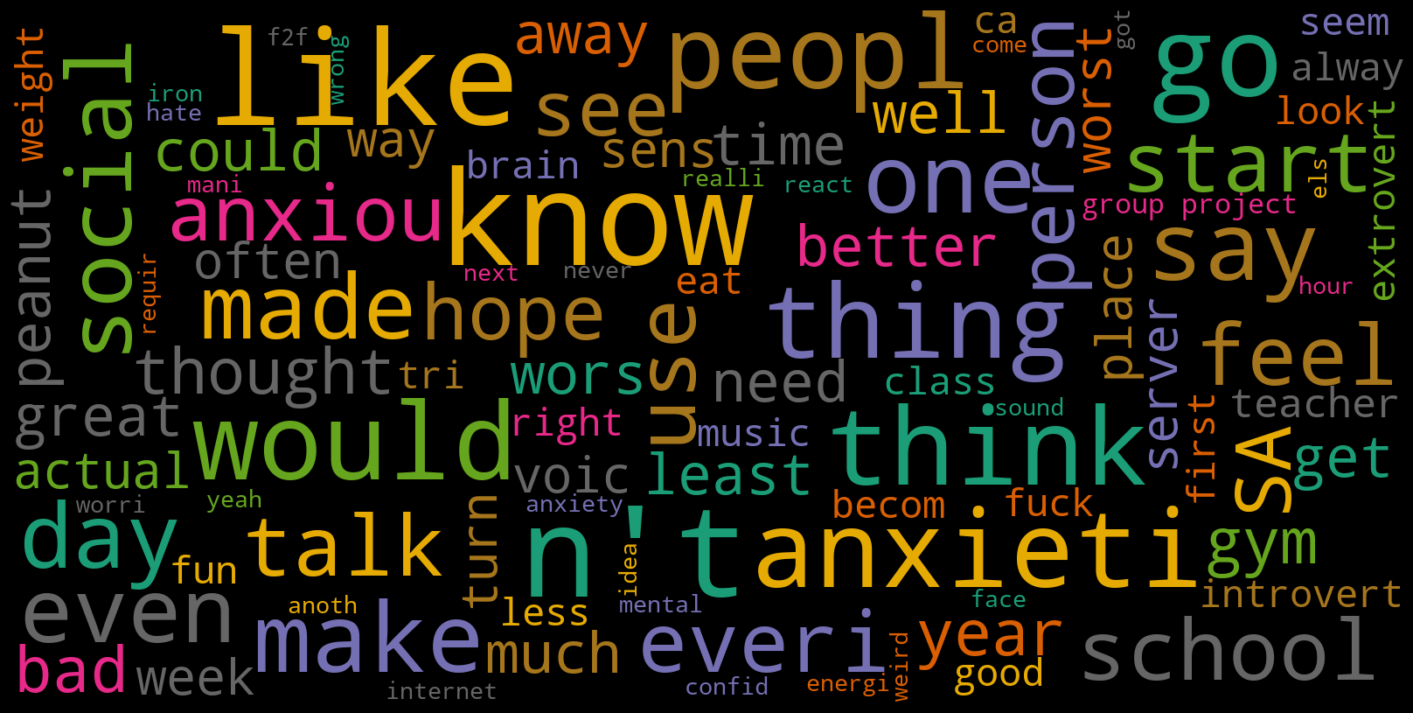

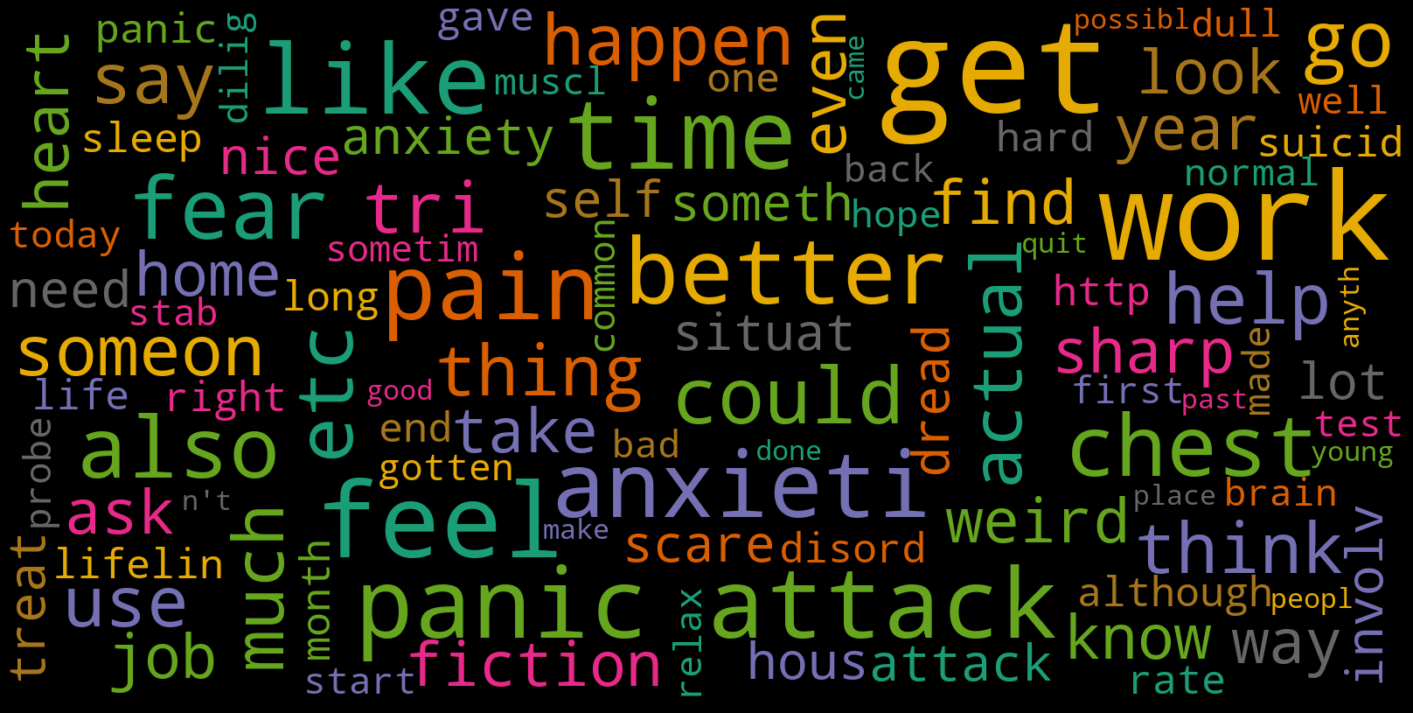

In [16]:
if __name__ == "__main__":
    groups = ["anxiety", "depression", "OCD", "socialanxiety", "panicdisorder"]
    for group in groups:
        f = open(f"./Datasets/{group}.txt")
        text = preprocessing(f.read(),group)
        f.close()
        